In [4]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
File = pd.read_csv('Twitter.csv')

In [7]:
# File

In [8]:
# File['Text']

In [9]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

In [10]:
File.head()

,Tweet Count,Status,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,Successful,tezos,Did you participated in Tezos? Already locked ...,,,,,,
1,1,Successful,tezos,#Ethereum Co-Founder Takes to Twitter to Disag...,,,,,,
2,2,Successful,tezos,Will this drive the XRP value up? #cryptocurre...,,,,,,
3,3,Successful,tezos,@CamiRusso and I just met with the CEO of @Ri...,,,,,,
4,4,Successful,tezos,Check out my latest Flux episode- on bitcoins ...,,,,,,


In [11]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['tweet']
#     print(sentence)
    blob = TextBlob(sentence)
#     print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['tweet'])["compound"]
    pos = analyzer.polarity_scores(row['tweet'])["pos"]
    neu = analyzer.polarity_scores(row['tweet'])["neu"]
    neg = analyzer.polarity_scores(row['tweet'])["neg"]
#     print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    
    
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


In [12]:
File.head()

,Tweet Count,Status,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,Successful,tezos,Did you participated in Tezos? Already locked ...,0,0,1,0,0,0
1,1,Successful,tezos,#Ethereum Co-Founder Takes to Twitter to Disag...,-0.3818,0,0.843,0.157,0,0
2,2,Successful,tezos,Will this drive the XRP value up? #cryptocurre...,0.34,0.118,0.882,0,0,0
3,3,Successful,tezos,@CamiRusso and I just met with the CEO of @Ri...,0.5574,0.135,0.865,0,0.363636,0.522727
4,4,Successful,tezos,Check out my latest Flux episode- on bitcoins ...,-0.1779,0,0.925,0.075,0.5,0.9


In [13]:
Success = File[File['Status'] == 'Successful'].sample(n=1000)
Mid_Success = File[File['Status'] == 'Mid'].sample(n=1000)
Failure = File[File['Status'] == 'Failure'].sample(n=1000)


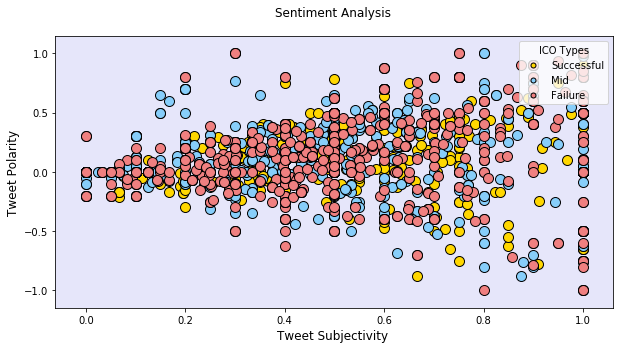

In [14]:
# Create data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1,facecolor='lavender')



colors = ["gold", "lightskyBlue", "lightcoral"]
explode = (0, 0, 0.05)

g1 = (Success.loc[(Success['Status'] == 'Successful'),['Subjectivity']], Success.loc[(Success['Status'] == 'Successful'),['Polarity']])
g2 = (Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Subjectivity']], Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Polarity']])
g3 = (Failure.loc[(Failure['Status'] == 'Failure'),['Subjectivity']], Failure.loc[(Failure['Status'] == 'Failure'),['Polarity']])


 
data = (g1, g2,g3)
groups = File['Status'].unique()

# Create plot 
for data, color, group in zip(data, colors, groups):
    x, y= data
    ax.scatter(x, y, 
               alpha=1.0, 
               c=color, 
               edgecolors='black', 
               s=100, 
               label=group)

plt.title('Sentiment Analysis ',y=1.05, fontsize = 12.0)
plt.xlabel('Tweet Subjectivity ',fontsize = 12.0)
plt.ylabel('Tweet Polarity',fontsize = 12.0)
plt.legend(title = "ICO Types", loc=1, markerscale = 0.5, fontsize = 10.0)
# plt.text(40,15,"Note: Circle size corelates with driver count per city", va = 'top',ha = 'left',fontsize=12.0)
# sns.set_style('darkgrid')
plt.savefig("bubbleplot.png")
plt.show()

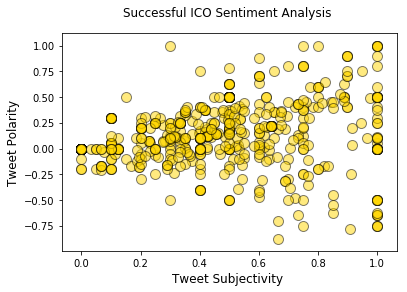

In [15]:
# Scatter for Successful ICO Tweets
x = Success.loc[(Success['Status'] == 'Successful'),['Subjectivity']]
y = Success.loc[(Success['Status'] == 'Successful'),['Polarity']]


plt.scatter(x, y, s=100, c='gold', alpha=0.5,edgecolors='black')


plt.title('Successful ICO Sentiment Analysis ',y=1.05, fontsize = 12.0)
plt.xlabel('Tweet Subjectivity ',fontsize = 12.0)
plt.ylabel('Tweet Polarity',fontsize = 12.0)
plt.show()

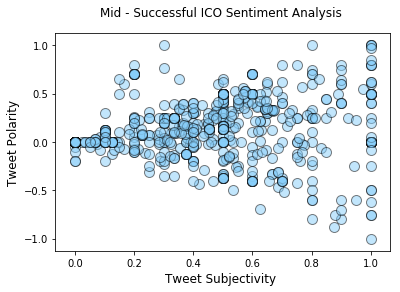

In [16]:
# Scatter for Mid - Successful ICO Tweets
x = Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Subjectivity']]
y = Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Polarity']]


plt.scatter(x, y, s=100, c='lightskyBlue', alpha=0.5,edgecolors='black')


plt.title('Mid - Successful ICO Sentiment Analysis ',y=1.05, fontsize = 12.0)
plt.xlabel('Tweet Subjectivity ',fontsize = 12.0)
plt.ylabel('Tweet Polarity',fontsize = 12.0)
plt.show()


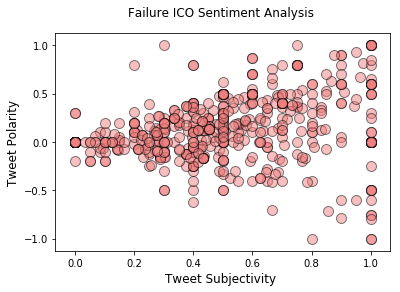

In [17]:
# Scatter for Failed ICO Tweets
x = Failure.loc[(Failure['Status'] == 'Failure'),['Subjectivity']]
y = Failure.loc[(Failure['Status'] == 'Failure'),['Polarity']]


plt.scatter(x, y, s=100, c='lightcoral', alpha=0.5,edgecolors='black')


plt.title('Failure ICO Sentiment Analysis ',y=1.05, fontsize = 12.0)
plt.xlabel('Tweet Subjectivity ',fontsize = 12.0)
plt.ylabel('Tweet Polarity',fontsize = 12.0)
plt.show()

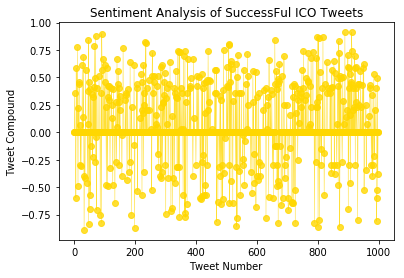

In [18]:
# Create plot
plt.plot(np.arange(len(Success["Compound"])),
         Success["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, color = 'gold')

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of SuccessFul ICO Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

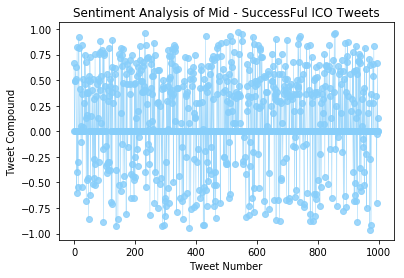

In [19]:
# Create plot
plt.plot(np.arange(len(Mid_Success["Compound"])),
         Mid_Success["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, color = 'lightskyBlue')

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Mid - SuccessFul ICO Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

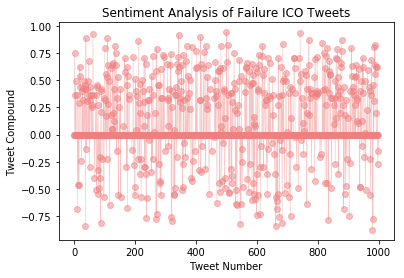

In [20]:
# Create plot
plt.plot(np.arange(len(Failure["Compound"])),
         Failure["Compound"], marker="o", linewidth=0.5,
         alpha=0.5, color = 'lightcoral')

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Failure ICO Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

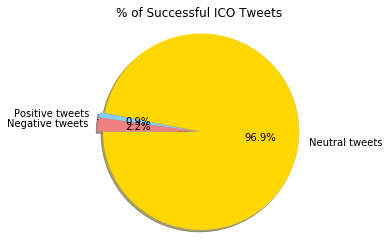

In [21]:
positive_polarity = [p for p in Success['Postivity'] if p>0.5]
negative_polarity = [n for n in Success['Negativity'] if n<0.5]
neutral_polarity = [r for r in Success['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size
explode = (0.05, 0, 0)

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode ,
                              labels = labels, 
                              colors=colors,
                              autopct="%1.1f%%", 
                              shadow=True, 
                              wedgeprops = {'linewidth': 0.8},
                              startangle=180,
                              radius = 1.0)
ax1.axis('equal')
ax1.set_title("% of Successful ICO Tweets")
plt.show()

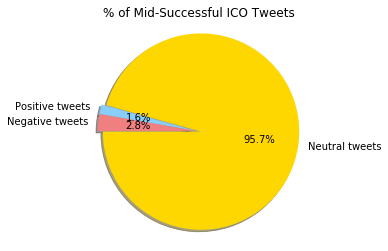

In [22]:
positive_polarity = [p for p in Mid_Success['Postivity'] if p>0.5]
negative_polarity = [n for n in Mid_Success['Negativity'] if n<0.5]
neutral_polarity = [r for r in Mid_Success['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode ,
                              labels = labels, 
                              colors=colors,
                              autopct="%1.1f%%", 
                              shadow=True, 
                              wedgeprops = {'linewidth': 0.8},
                              startangle=180,
                              radius = 1.0)
ax1.axis('equal')
ax1.set_title("% of Mid-Successful ICO Tweets")

plt.show()

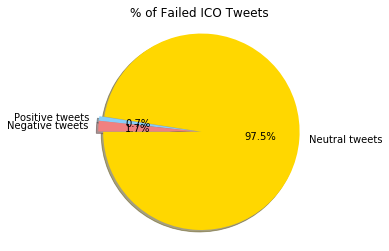

In [23]:
positive_polarity = [p for p in Failure['Postivity'] if p>0.5]
negative_polarity = [n for n in Failure['Negativity'] if n<0.5]
neutral_polarity = [r for r in Failure['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode ,
                              labels = labels, 
                              colors=colors,
                              autopct="%1.1f%%", 
                              shadow=True, 
                              wedgeprops = {'linewidth': 0.8},
                              startangle=180,
                              radius = 1.0)
ax1.axis('equal')
ax1.set_title("% of Failed ICO Tweets")

plt.show()

In [24]:
# suupositive_polarity = [p for p in Success['Postivity'] if p>0.5]
# fainegative_polarity = [p for p in Failure['Postivity'] if p>0.5]
# midneutral_polarity = [p for p in Mid_Success['Postivity'] if p>0.5]


# total_size = len(suupositive_polarity) + len(fainegative_polarity) + len(midneutral_polarity)
# n_size = len(suupositive_polarity)/total_size
# p_size = len(fainegative_polarity)/total_size
# r_size = len(midneutral_polarity)/total_size


# labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
# sizes = [r_size, p_size, n_size]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')
# plt.show()